
# Project: Predicting Boston Housing Prices



## Overview
In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.



In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
from sklearn import cross_validation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


/usr/local/lib/python2.7/dist-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Data Exploration


###  Calculate Statistics


In [3]:
housing_features=pd.DataFrame(data)
housing_prices=pd.DataFrame(prices)


minimum_price = np.min(prices)


maximum_price = np.max(prices)


mean_price = np.mean(prices)


median_price = np.median(prices)


std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


###  Feature Observation

- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_

1. RM-If  number of rooms in house increases, the area occupied by a house increases. Bigger houses are costlier than smaller houses. A house cost generally depends on its size. So 'MEDV' increases with 'RM'  
2. LSTAT- Cost of homes('MEDV') generally depends on size of house and its also depends on neighborhood. So house cost('MEDV')  depends on LSTAT. The house prices('MEDV') may generally decreases with LSTAT
3. PTRATIO- House prices('MEDV') generally doesn't depends on the ratio of students to teachers ratio in schools nearby. So prices may not change with PTRATIO

----

## Developing a Model


###  Define a Performance Metric


In [4]:

from sklearn.metrics import r2_score


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    
    score = r2_score(y_true, y_predict)
    print score
    # Return the score
    return score

### Goodness of Fit


In [25]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

0.922855648536
Model has a coefficient of determination, R^2, of 0.923.


yes the model succesfully captured the variation, because R^2 is good(near 1)

### Shuffle and Split Data


In [5]:

from sklearn.model_selection import train_test_split

x1, x2, y1, y2 = train_test_split(features, prices, test_size=0.2, random_state=0)

X_train, X_test, y_train, y_test = (x1, x2, y1, y2)


print "Training and testing split was successful."

Training and testing split was successful.


### Training and Testing


Its helpful to validate the performance of model on a new dataset. Helful to find overfitting of model(large varience)

----

## Analyzing Model Performance


### Learning Curves


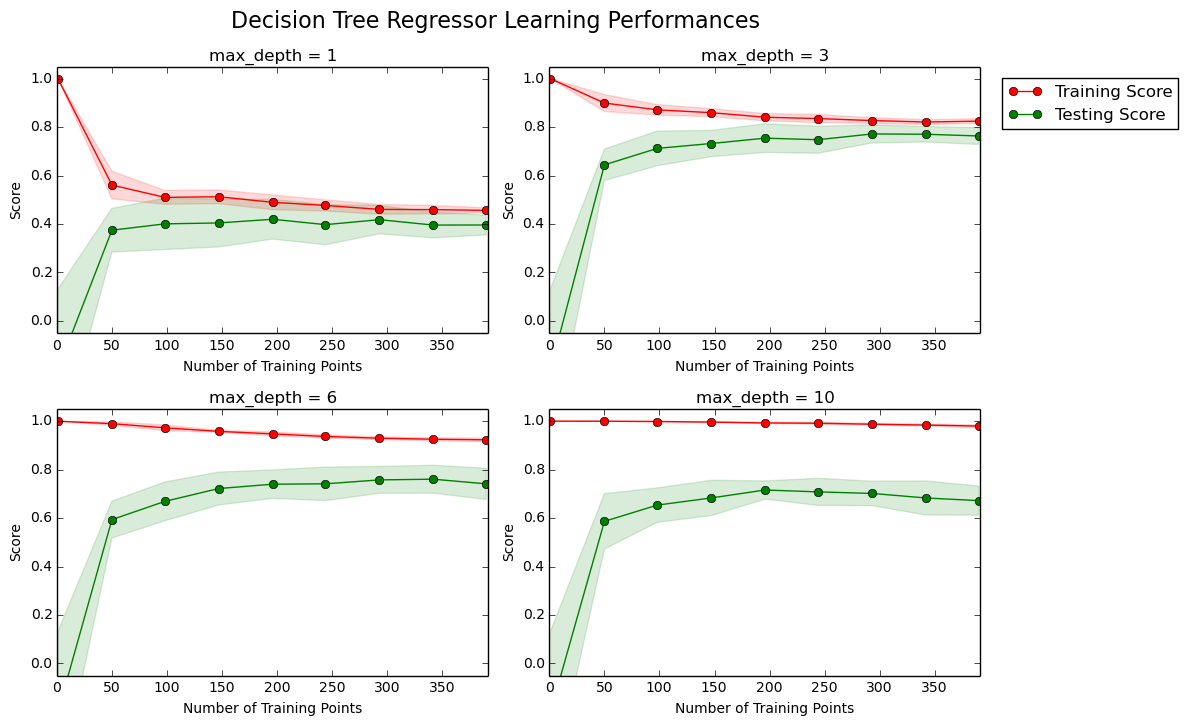

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

###  Learning the Data


Max Depth=3,When the model is trained with less data points (>50), score of model on training data set is good and score of model on test data set is not good.So it shown some signs of overfitting or high varience. When the training data incresed to 100, the model shown good score on training dataset and average score on test data set (shown signs of overfitting/high varience). The model shown slight signs of overfitting when the training data is less than 300. But for training data more than 300,the model performed well.
score of training curve won't change much eventhough more training points added(<300), testing curve also won't change much by adding more training points, adding more training points (<300) won't benfit the model. The score of model on trainining set won't improve if more training points(<300) increased. Further, score of model on testing set also won't improve eventhough training points(<300) are increased.

### Complexity Curves


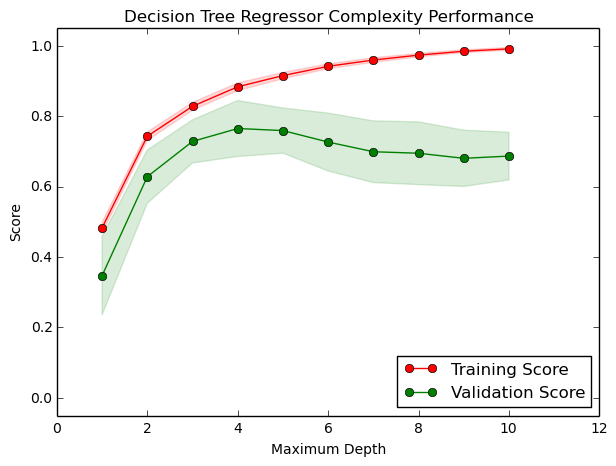

In [7]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff


The model trained with maximum depth of 1 suffered with high Bias, alternatively the model trained with maximum depth of 10 suffered with high varience. The model trained with maximum depth 1 is having low score onr training and test datasets, so we can confirm that the model suffered with high bias. The model trained with maximum depth 10, is having very good score for training data set and low score on test dataset. So we can confirm the model suffered high varience (overfitting) 

### Best-Guess Optimal Model


The model with maximum depth of 3 generalizes the unseen data better. This model is having good training and test data scores and they converged (very near to each other)

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Grid Search


Grid search technique is used optimize the parameters of estimators/classifiers.The traditional way of performing hyperparameter optimization has been grid search, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a held-out validation set. It can be applied using GridSearchCV() for which parameters like estimator, parameters,scoring function and cross-validation set should be provided.

### Cross-Validation


Learning and testing parameters of prediction on same data is a methadological mistake.Inorder to avoid overfitting crossvalidation is used. In k-fold cross-validation, the original data is randomly partitioned into  equal sized k subsamples, Of these subsamples(k), a single subsample is taken as the test data for testing the model, and the remaining (k−1) subsamples are used for training the model as training data. The cross-validation process is then repeated k times (for k-folds), with each of the k subsamples used exactly once as the test data. The results from the k k folds can then be averaged to produce a single estimation. The advantage of this method over repeated random sub-sampling is that all observations are used for both training and test of data, and each observation is used for testing exactly once. The value of k may be fixed but, Generally 10-fold cross-validation is commonly used. Grid search technique is used to optimize parameters of estimators, but grid search technique partcularly dealing with unevenly distributed data(data with skewed classes) may fail because of training the data having only some type of classes and testing on data with different classes. Alternatively, k-fold cross validation provides folds having all types of classes and helps Grid Search to find model that generalizes well.Without using cross-validation data, GridSearch may not always optimize estimators features correctly.



###  Fitting a Model


In [10]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter=10, test_size = 0.20, random_state = 0)
    #print cv_sets
   
    regressor = DecisionTreeRegressor()

    
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

   
    scoring_fnc = make_scorer(performance_metric)

    
    grid=GridSearchCV(regressor, params,scoring=scoring_fnc,cv=cv_sets)
                        

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X,y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions


### Optimal Model


In [11]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

0.365760327663
0.494920099074
0.50632287824
0.46164849644
0.289374416662
0.497048618673
0.206674024144
0.512490875563
0.441012859035
0.476910224007
0.377228139191
0.486346699242
0.327002196032
0.495173658902
0.46408313206
0.470004359521
0.445820187574
0.477933754379
0.498009448886
0.465878473377
0.596455712486
0.757492378126
0.61449527193
0.755700340444
0.551644413704
0.75961071531
0.457863358782
0.767961588139
0.727678324477
0.734464087159
0.646475501926
0.752057377567
0.61657559601
0.745438356382
0.692578535132
0.736068682655
0.711942957451
0.736275381083
0.73299922555
0.731320650638
0.77496891417
0.850413413111
0.693715045685
0.852011146288
0.683941436565
0.850703757838
0.609810798318
0.86799291788
0.765226013963
0.838450118449
0.785973638905
0.849056913317
0.73976419724
0.834277102434
0.782613385717
0.846501869808
0.797696572139
0.820088700193
0.82396998327
0.840388538829
0.817556164156
0.886416402346
0.737907830442
0.896017181005
0.704025340159
0.892432714932
0.662966146962
0.8991

max_depth of 4 optimal for the model, It's near to my prediction in question 6

###  Predicting Selling Prices


In [11]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $404,682.35
Predicted selling price for Client 2's home: $222,785.29
Predicted selling price for Client 3's home: $922,800.00


Client 1's home: $404,682.35, Client 2's home: $222,785.29, Client 3's home: $922,800.00
The predictios obtained are relavent to statastics observed in Data Exploration section. client 2 home is having less number of rooms(4 rooms) and the model predicted least amount (out of three), next the client 1 is having more rooms than client 2 and the model predicted more selling price compared to client 2. Finally, client three is having highest number of rooms and the model predicted highest selling price.
Finally, the predictions are also relevant to neighborhood poverty level (i.e. predicted selling price decreased with increae of neighborhood poverty level)

### Sensitivity


In [12]:
vs.PredictTrials(features, prices, fit_model, client_data)

0.365760327663
0.494920099074
0.50632287824
0.46164849644
0.289374416662
0.497048618673
0.206674024144
0.512490875563
0.441012859035
0.476910224007
0.377228139191
0.486346699242
0.327002196032
0.495173658902
0.46408313206
0.470004359521
0.445820187574
0.477933754379
0.498009448886
0.465878473377
0.596455712486
0.757492378126
0.61449527193
0.755700340444
0.551644413704
0.75961071531
0.457863358782
0.767961588139
0.727678324477
0.734464087159
0.646475501926
0.752057377567
0.61657559601
0.745438356382
0.692578535132
0.736068682655
0.711942957451
0.736275381083
0.73299922555
0.731320650638
0.77496891417
0.850413413111
0.693715045685
0.852011146288
0.683941436565
0.850703757838
0.609810798318
0.86799291788
0.765226013963
0.838450118449
0.785973638905
0.849056913317
0.73976419724
0.834277102434
0.782613385717
0.846501869808
0.797696572139
0.820088700193
0.82396998327
0.840388538829
0.817556164156
0.886416402346
0.737907830442
0.896017181005
0.704025340159
0.892432714932
0.662966146962
0.8991

###  Applicability


1. There is a lot of difference in housing prices in 1978 and 2016. They may be increased by ten times in some places. So data collected in 1978 is not relevant for 2016.     
2.The features present in data are sufficient to describe home.        
3.The model is robust enough to make consistent predictions, because the R2 obtained is more than 0.9.     
4.The data collected in urban cities may not be always applicable in rural city.    